<a href="https://colab.research.google.com/github/vivan-doshi/Insurance_claims/blob/main/HW5_Vivan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5

Name: Vivan

## Question 1: True or False

(i) If a dataset contains only one feature, a decision tree will still try to split it into multiple nodes.

Ans: True: It will keep splitting as long as it finds patterns in the data.

--------

(ii) The Gini index reaches its maximum value when the classes are perfectly balanced.

Ans: True: The Gini index is highest when classes are evenly split (binary classification). This means the data is most mixed and impure.

---------

(iii) Constructing a decision tree using a greedy algorithm guarantees finding the most optimal tree.

Ans: False: It makes the best choice at each step, but that may not lead to the best overall tree. There might be better splits ahead that greedy doesn't always catch.

-------------

(iv) A decision tree always chooses the feature with the highest correlation to the target variable for
splitting.

Ans: False: It selects the feature that best separates the data, based on impurity measures like Gini index or entropy.

-----------

(v) Decision trees can automatically handle missing values in predictors without any preprocessing.

Ans: False: You usually need to fill in or handle missing data before training the tree.

-------------------

# Marketing Campaign Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Replace the path the actual folder name
os.chdir('/content/drive/MyDrive/530_ML/Homework/Homework_5')

# Confirm that the files are accessible
os.listdir()

['marketing_campaign.csv', 'HW5_Vivan']

In [ ]:
# necessary imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import random
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.formula.api as smf
import seaborn as sns

In [ ]:
marketing_campaign = pd.read_csv('marketing_campaign.csv')
marketing_campaign.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## Question 2: Pre-processing

### (a) Are there any missing values in the data? If so, remove the rows containing missing values.

In [ ]:
marketing_campaign.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
marketing_campaign = marketing_campaign.dropna()

In [ ]:
marketing_campaign.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


### (b) Drop the following columns:
- Dt_Customer
- ID
- Z_CostContact
- Z_Revenue
- Year_Birth
- AcceptedCmp3
- AcceptedCmp4
- AcceptedCmp5
- AcceptedCmp1
- AcceptedCmp2

In [ ]:
columns_to_drop = ['Dt_Customer', 'ID', 'Z_CostContact', 'Z_Revenue',
                   'Year_Birth', 'AcceptedCmp3', 'AcceptedCmp4',
                   'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

marketing_campaign_1 = marketing_campaign.copy()
marketing_campaign = marketing_campaign.drop(columns=columns_to_drop)


### (c) Create a box plot of Income and identify any outliers. Remove observations that fall outside 1.5 times the interquartile range (IQR) of the Income variable.

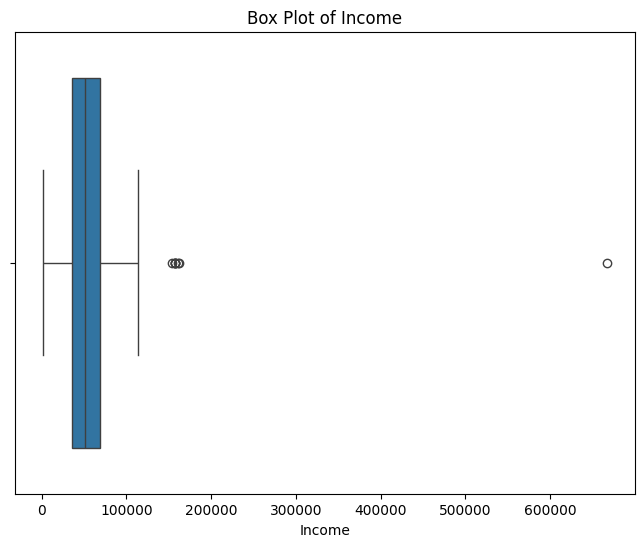

Original size: 2216
Size after removing outliers: 2208


In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Income', data=marketing_campaign)
plt.title('Box Plot of Income')
plt.show()

Q1 = marketing_campaign['Income'].quantile(0.25)
Q3 = marketing_campaign['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

marketing_campaign_w_outliers = marketing_campaign.copy()
marketing_campaign = marketing_campaign[
    (marketing_campaign['Income'] >= lower_bound) & (marketing_campaign['Income'] <= upper_bound)
]
print(f"Original size: {len(marketing_campaign_w_outliers)}")
print(f"Size after removing outliers: {len(marketing_campaign)}")


### (d) Identify the categorical variables and create the corresponding dummy variables. Set ‘Response’ as y and the remaining variables as the predictor matrix X. Split the data into training and test sets, keeping 30 % of the data in the test set and using random state=42 and stratifying by y.

In [ ]:
marketing_campaign.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2208 non-null   object 
 1   Marital_Status       2208 non-null   object 
 2   Income               2208 non-null   float64
 3   Kidhome              2208 non-null   int64  
 4   Teenhome             2208 non-null   int64  
 5   Recency              2208 non-null   int64  
 6   MntWines             2208 non-null   int64  
 7   MntFruits            2208 non-null   int64  
 8   MntMeatProducts      2208 non-null   int64  
 9   MntFishProducts      2208 non-null   int64  
 10  MntSweetProducts     2208 non-null   int64  
 11  MntGoldProds         2208 non-null   int64  
 12  NumDealsPurchases    2208 non-null   int64  
 13  NumWebPurchases      2208 non-null   int64  
 14  NumCatalogPurchases  2208 non-null   int64  
 15  NumStorePurchases    2208 non-null   int64 

In [ ]:
marketing_campaign.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0


In [ ]:
# Identify categorical columns
categorical_cols = ['Education', 'Marital_Status']

# Convert categorical columns to categorical data type
for col in categorical_cols:
    marketing_campaign[col] = pd.Categorical(marketing_campaign[col])
display(marketing_campaign.head())
marketing_campaign_2 = marketing_campaign.copy()

# Create dummy variables for categorical columns
marketing_campaign = pd.get_dummies(marketing_campaign, columns=categorical_cols, drop_first=True)
display(marketing_campaign.head())

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,58,635,88,546,172,88,88,...,True,False,False,False,False,False,True,False,False,False
1,46344.0,1,1,38,11,1,6,2,1,6,...,True,False,False,False,False,False,True,False,False,False
2,71613.0,0,0,26,426,49,127,111,21,42,...,True,False,False,False,False,False,False,True,False,False
3,26646.0,1,0,26,11,4,20,10,3,5,...,True,False,False,False,False,False,False,True,False,False
4,58293.0,1,0,94,173,43,118,46,27,15,...,False,False,True,False,False,True,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

# Set 'Response' as the target variable (y)
y = marketing_campaign['Response']

# Set the remaining columns as the predictor matrix (X)
X = marketing_campaign.drop('Response', axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


### (e) How many predictors are there in X?

In [ ]:
X.shape[1]


27

## Question 3: Penalized Logistic Regression

### (a) Train a logistic regression classifier without penalty, with a LASSO penalty and a ridge penalty, using the predictors in X to predict campaign responses. Perform 5-fold stratified cross-validation with grid search to tune the models where needed and select the best parameters. Report the optimal parameter values.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler

# first we need to scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# now we do logistic regression without a penalty
logreg_no_penalty = LogisticRegression(penalty=None, solver = 'saga', max_iter = 10_000)
logreg_no_penalty.fit(X_train_scaled, y_train)
print("Logistic Regression without penalty:")
print(f"Optimal parameters: None")

# Lasso based logisitic regression
param_grid_lasso = {'C': list(np.logspace(-4, 4, 20))}
logreg_lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
grid_search_lasso = GridSearchCV(logreg_lasso, param_grid_lasso, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search_lasso.fit(X_train_scaled, y_train)
print("\nLogistic Regression with LASSO penalty:")
print(f"Optimal parameters: {grid_search_lasso.best_params_}")

# Ridge based logistic regression
param_grid_ridge = {'C': list(np.logspace(-4, 4, 20))}
logreg_ridge = LogisticRegression(penalty='l2', solver='saga', max_iter=10000)
grid_search_ridge = GridSearchCV(logreg_ridge, param_grid_ridge, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search_ridge.fit(X_train_scaled, y_train)
print("\nLogistic Regression with Ridge penalty:")
print(f"Optimal parameters: {grid_search_ridge.best_params_}")

Logistic Regression without penalty:
Optimal parameters: None

Logistic Regression with LASSO penalty:
Optimal parameters: {'C': np.float64(0.615848211066026)}

Logistic Regression with Ridge penalty:
Optimal parameters: {'C': np.float64(0.615848211066026)}


### (b) For the three models in part (a), use the optimal parameters to refit the trained model and predict the responses on the test data, and produce the confusion matrices comparing the test labels to the predicted test labels. Report the precision, recall and the ROC-AUC on the test data for the three models. Which model has the best performance? Summarize your findings.


No Penalty Model
Confusion Matrix:


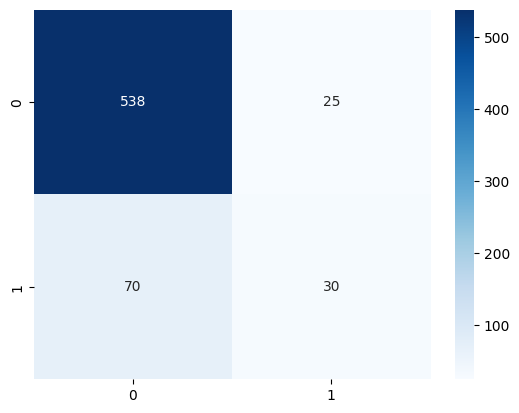

Precision: 0.5455
Recall: 0.3000
ROC-AUC: 0.8481

LASSO Model
Confusion Matrix:


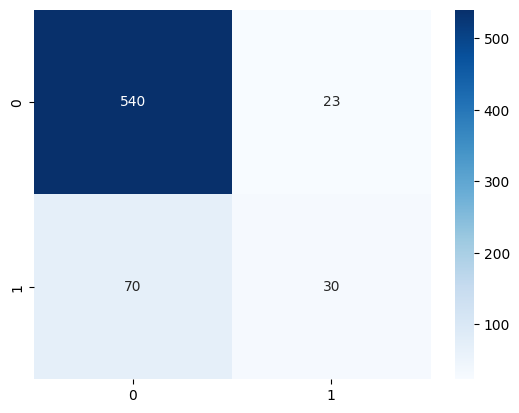

Precision: 0.5660
Recall: 0.3000
ROC-AUC: 0.8524

Ridge Model
Confusion Matrix:


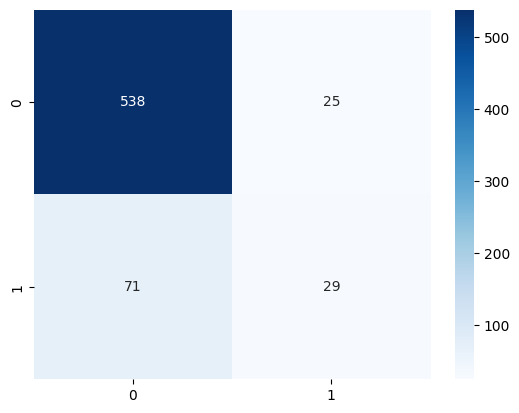

Precision: 0.5370
Recall: 0.2900
ROC-AUC: 0.8504

Best performing model (based on ROC-AUC): LASSO


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score
import seaborn as sns

# Refit models with optimal parameters and predict on test data
models = {
    'No Penalty': (LogisticRegression(penalty=None, solver='saga', max_iter=10000), {}),
    'LASSO': (LogisticRegression(penalty='l1', solver='saga', max_iter=10000), grid_search_lasso.best_params_),
    'Ridge': (LogisticRegression(penalty='l2', solver='saga', max_iter=10000), grid_search_ridge.best_params_)
}

results = {}
for name, (model, params) in models.items():
    model.set_params(**params)  # Apply optimal parameters
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    results[name] = {
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob)
    }

    print(f"\n{name} Model")
    print("Confusion Matrix:")
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.show()
    print(f"Precision: {results[name]['precision']:.4f}")
    print(f"Recall: {results[name]['recall']:.4f}")
    print(f"ROC-AUC: {results[name]['roc_auc']:.4f}")


# Compare model performance
best_model = max(results, key=lambda k: results[k]['roc_auc'])  # Example: prioritize ROC-AUC
print(f"\nBest performing model (based on ROC-AUC): {best_model}")

Best performing model according to AUC-RUC is lasso, but it is better due to very few margins. Even looking at the confusion matrix we see that Lasso is a better model

## Question 4: Decision Trees

### (a) Fit a classification tree to the training data, with y as the response and the other variables as predictors. Do not prune it yet. What is the training error rate?

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predict on the training data
y_pred_train = tree.predict(X_train)

# Calculate the training error rate
training_error = 1 - sum(y_pred_train == y_train) / len(y_train)
print(f"Training error rate: {round(training_error,6)}")

Training error rate: 0.001942


### (b) Create a plot of the tree, and interpret the results. How many terminal nodes does the tree have?

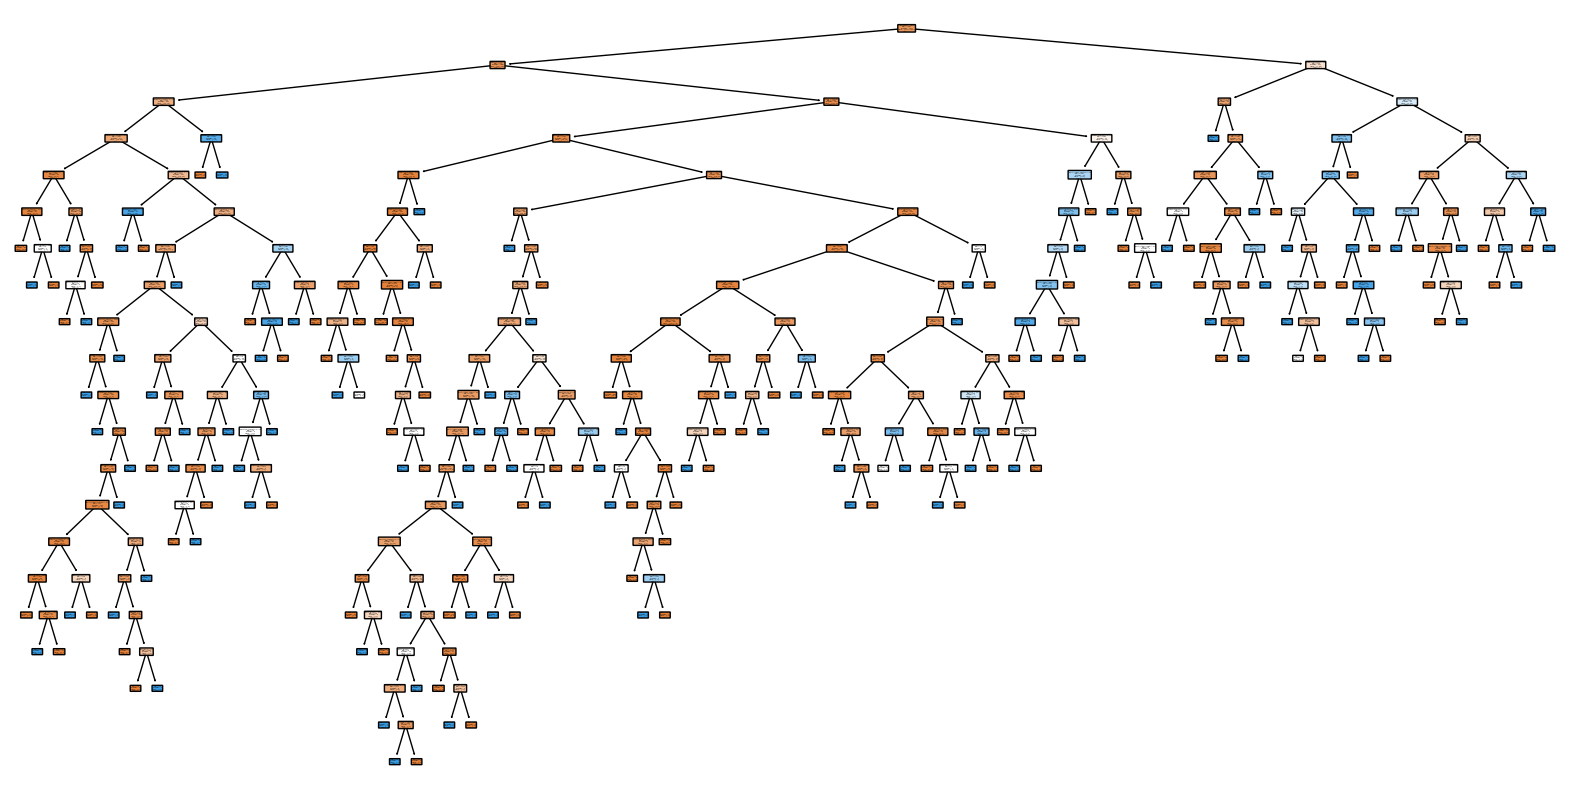

The tree has 168 terminal nodes.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=['0','1'], rounded=True)
plt.show()

# Count the number of leaves
n_leaves = tree.get_n_leaves()
print(f"The tree has {n_leaves} terminal nodes.")

### (c) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

Test error rate: 0.202112
Confusion Matrix:


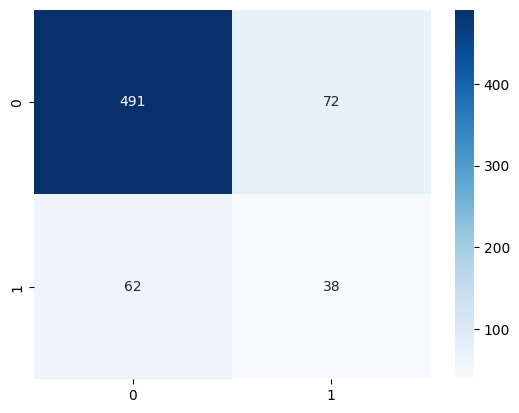

In [ ]:
import matplotlib.pyplot as plt
# Predict on the test data
y_pred_test = tree.predict(X_test)

# Calculate the test error rate
test_error = 1 - sum(y_pred_test == y_test) / len(y_test)
print(f"Test error rate: {round(test_error,6)}")

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

### (d) Use 5-fold grid search cross-validation (stratified) on the training set in order to determine the optimal parameters for cost complexity pruning to obtain a pruned tree. Produce a plot with penalty parameter on the x-axis and cross-validated classification error rate on the y-axis. Which value of the penalty parameter produces the optimal pruned tree?

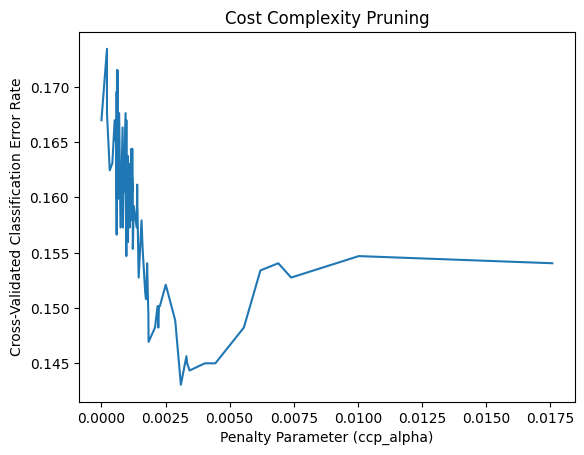

Optimal penalty parameter (ccp_alpha): 0.003097


In [ ]:
import matplotlib.pyplot as plt
# Cost complexity pruning
ccp_alphas = tree.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
error_rates = []
for alpha in ccp_alphas:
    tree_cv = DecisionTreeClassifier(ccp_alpha=alpha)
    errors = []
    for train_index, test_index in cv.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        tree_cv.fit(X_train_fold, y_train_fold)
        y_pred_fold = tree_cv.predict(X_test_fold)
        errors.append(1 - sum(y_pred_fold == y_test_fold) / len(y_test_fold))
    error_rates.append(sum(errors) / len(errors))

# Plot error rate vs. alpha
plt.plot(ccp_alphas, error_rates)
plt.xlabel("Penalty Parameter (ccp_alpha)")
plt.ylabel("Cross-Validated Classification Error Rate")
plt.title("Cost Complexity Pruning")
plt.show()

# Find the optimal alpha
optimal_alpha = ccp_alphas[error_rates.index(min(error_rates))]
print(f"Optimal penalty parameter (ccp_alpha): {round(optimal_alpha,6)}")

### (e) Produce a pruned tree corresponding to the optimal parameter obtained in part (d). Use the export_text() function to produce a text summary of the fitted pruned tree. Pick one of the terminal nodes, and interpret the information displayed.

Pruned Tree Structure:
|--- MntWines <= 796.50
|   |--- Recency <= 20.50
|   |   |--- NumWebVisitsMonth <= 8.50
|   |   |   |--- NumCatalogPurchases <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- NumCatalogPurchases >  0.50
|   |   |   |   |--- NumStorePurchases <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- NumStorePurchases >  2.50
|   |   |   |   |   |--- MntMeatProducts <= 492.00
|   |   |   |   |   |   |--- MntFishProducts <= 188.50
|   |   |   |   |   |   |   |--- NumDealsPurchases <= 3.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- NumDealsPurchases >  3.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- MntFishProducts >  188.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- MntMeatProducts >  492.00
|   |   |   |   |   |   |--- class: 1
|   |   |--- NumWebVisitsMonth >  8.50
|   |   |   |--- class: 1
|   |--- Recency >  20.50
|   |   |--- Income <= 82539.50
|   |   |   |--

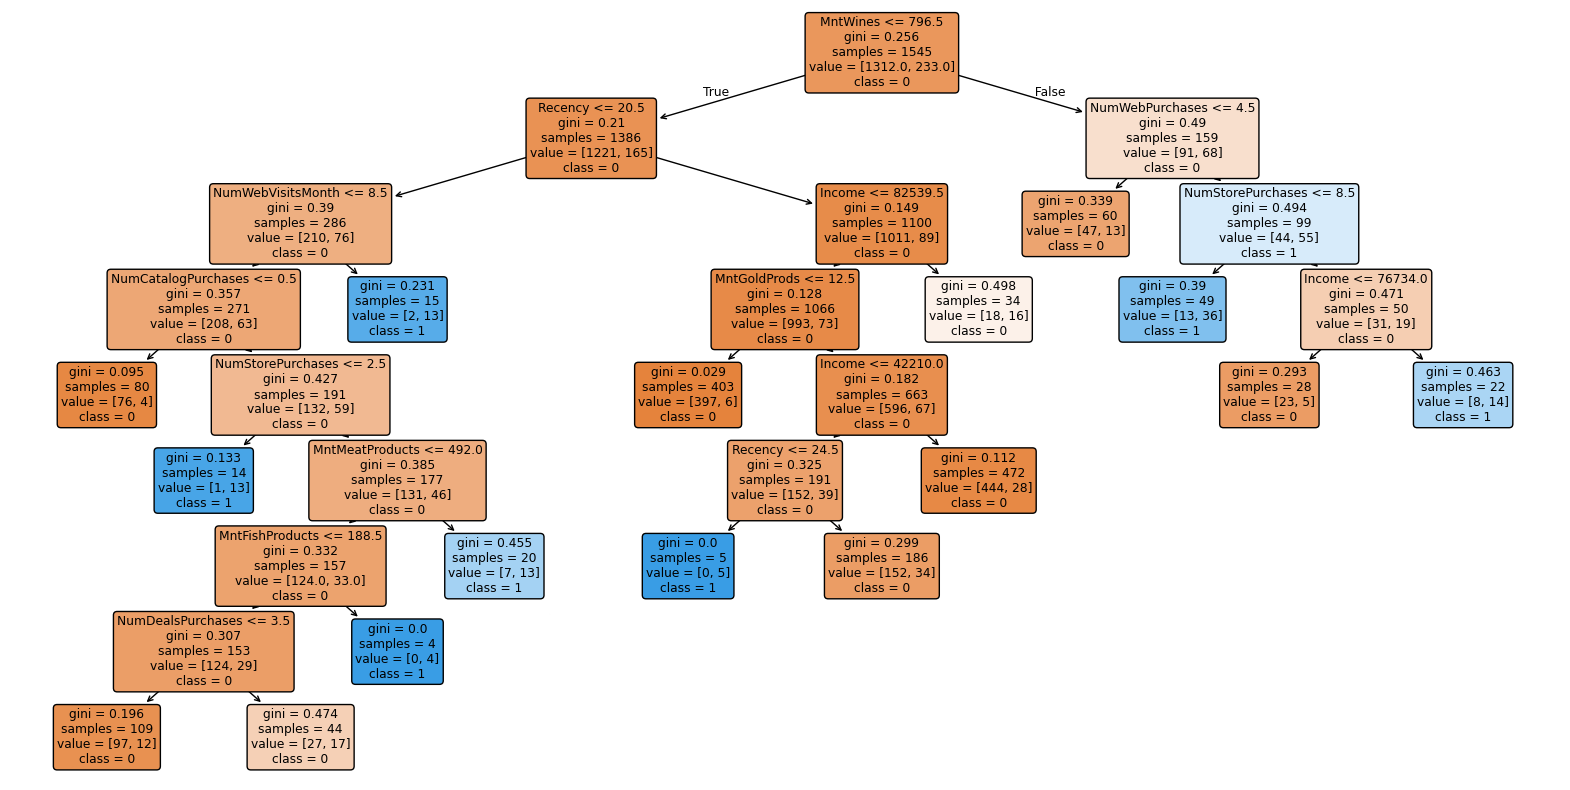

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt

# Train the pruned decision tree
pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
pruned_tree.fit(X_train, y_train)

# Export the tree as text
tree_text = export_text(pruned_tree, feature_names=list(X_train.columns))
print("Pruned Tree Structure:")
print(tree_text)

# Plotting the tree
plt.figure(figsize=(20, 10))
plot_tree(pruned_tree, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True)
plt.show()


**How We Reached This Node:** <br>
The decision path leading to this terminal node involves several splits. The conditions applied at each step are:

1. **Root Node**:
   - Feature: `MntWines <= 796.5`
   - Outcome: The split went to the **left** (True branch) because the samples met this condition.
   - That is if their mntwines was lesser than 796.5 or equal to it

2. **Node 2**:
   - Feature: `Recency <= 20.5`
   - Outcome: The split went to the **left** (True branch).
   - That is if their recency was less than or equal to 20.5 units

3. **Node 3**:
   - Feature: `Income <= 82539.5`
   - Outcome: The split went to the **left** (True branch).
   - That is if their income is less than or equal to \$82,539.50

4. **Node 4**:
   - Feature: `MntGoldProds <= 12.5`
   - Outcome: The split went to the **left** (True branch).

5. **Node 5**:
   - Feature: `Income <= 42210.0`
   - Outcome: The split went to the **right** (False branch).

6. **Node 6**:
   - Feature: `Recency <= 24.5`
   - Outcome: The split went to the **right** (False branch).

7. **Node 7**:
   - Feature: `MntFishProducts <= 188.5`
   - Outcome: The split went to the **right** (False branch).

8. **Terminal Node**:
   - Gini Impurity: `0.0` (Pure node)
   - Samples: `5`
   - Value: `[0, 5]`
   - Class: `1`

**Interpretation:**
- **Gini Impurity**: The Gini impurity is `0.0`, indicating that this node is pure, meaning all the samples belong to a single class (`class 1`).
- **Samples**: There are `5` samples that reach this node.
- **Value**: The array `[0, 5]` shows the distribution of classes. Here, all `5` samples belong to `class 1` and none belong to `class 0`.
- **Class**: The node is labeled as `class 1` because all samples are from this class.

**What This Means:** <br>
The model has successfully isolated a subset of the data where all samples belong to `class 1` with perfect accuracy. This is achieved by applying a series of conditions (splits) leading to this leaf node.

However, having very small leaf nodes (like this one with only 5 samples) might indicate potential overfitting, especially if the dataset is large.


### (f) Compare the training error rates between the pruned and unpruned trees. Which is higher?

In [ ]:
from sklearn.tree import export_text

# Predict on the training data using the pruned tree
y_pred_train_pruned = pruned_tree.predict(X_train)

# Calculate the training error rate for the pruned tree
training_error_pruned = 1 - sum(y_pred_train_pruned == y_train) / len(y_train)
print(f"Pruned Tree Training error rate: {round(training_error_pruned,6)}")

print(f"Unpruned Tree Training error rate: {round(training_error,6)}")

if training_error_pruned > training_error:
    print("The pruned tree has a higher training error rate.")
else:
    print("The unpruned tree has a higher training error rate.")

Pruned Tree Training error rate: 0.107443
Unpruned Tree Training error rate: 0.001942
The pruned tree has a higher training error rate.


### (g) Compare the test error rates between the pruned and unpruned trees. Which is higher?

In [ ]:
# Predict on the test data using the pruned tree
y_pred_test_pruned = pruned_tree.predict(X_test)

# Calculate the test error rate for the pruned tree
test_error_pruned = 1 - sum(y_pred_test_pruned == y_test) / len(y_test)
print(f"Pruned Tree Test error rate: {round(test_error_pruned,6)}")

print(f"Unpruned Tree Test error rate: {round(test_error,6)}")

if test_error_pruned > test_error:
    print("The pruned tree has a higher test error rate.")
else:
    print("The unpruned tree has a higher test error rate.")

Pruned Tree Test error rate: 0.171946
Unpruned Tree Test error rate: 0.202112
The unpruned tree has a higher test error rate.


### (h) Compare the ROC curves corresponding to the optimal decision tree classifier, and the three models explored in Question 3. Explain your findings.

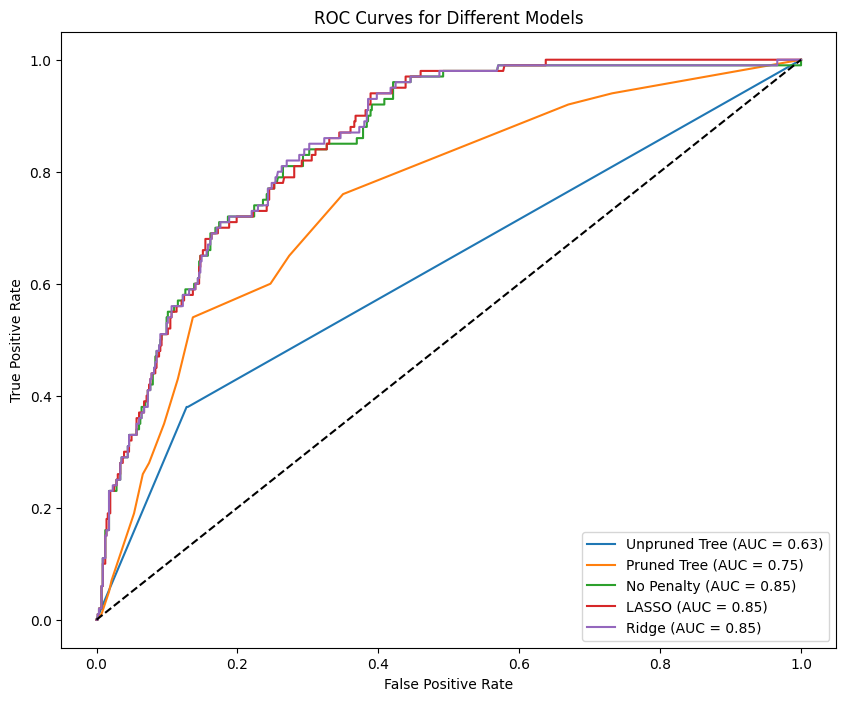

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curves for all models
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

# Decision Trees
y_prob_tree = tree.predict_proba(X_test)[:, 1]
fpr_dict['Unpruned Tree'], tpr_dict['Unpruned Tree'], _ = roc_curve(y_test, y_prob_tree)
roc_auc_dict['Unpruned Tree'] = auc(fpr_dict['Unpruned Tree'], tpr_dict['Unpruned Tree'])

y_prob_pruned_tree = pruned_tree.predict_proba(X_test)[:, 1]
fpr_dict['Pruned Tree'], tpr_dict['Pruned Tree'], _ = roc_curve(y_test, y_prob_pruned_tree)
roc_auc_dict['Pruned Tree'] = auc(fpr_dict['Pruned Tree'], tpr_dict['Pruned Tree'])

# Logistic Regression models
for name, (model, params) in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr_dict[name], tpr_dict[name], _ = roc_curve(y_test, y_prob)
    roc_auc_dict[name] = auc(fpr_dict[name], tpr_dict[name])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name in list(roc_auc_dict.keys()):
    plt.plot(fpr_dict[name], tpr_dict[name], label=f'{name} (AUC = {roc_auc_dict[name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()

The ROC curves compare the performance of five different models: Unpruned Tree, Pruned Tree, No Penalty Logistic Regression, LASSO, and Ridge Regression. The performance of each model is evaluated based on the Area Under the Curve (AUC) metric.

- The **Unpruned Tree** has the lowest AUC of `0.63`. This suggests that the model is overfitting the training data and fails to generalize well to unseen data. The curve is relatively close to the diagonal line, indicating poor discrimination ability.

- The **Pruned Tree** shows improved performance with an AUC of `0.76`. Pruning has reduced overfitting by limiting the tree’s depth, resulting in better generalization compared to the unpruned tree.

- The **No Penalty Logistic Regression** achieves an AUC of `0.85`. It serves as a strong baseline model with no regularization applied. The high AUC indicates good predictive performance.

- The **LASSO Regression** (AUC = `0.85`) and **Ridge Regression** (AUC = `0.85`) models also perform well, matching the performance of the No Penalty model. The similarity in performance suggests that regularization did not significantly improve or degrade the model's ability to discriminate between classes.

- All models except the Unpruned Tree have AUCs above `0.75`, indicating satisfactory predictive ability. However, the logistic regression models (No Penalty, LASSO, and Ridge) achieve the highest AUC scores, suggesting they are the most reliable models in this comparison.

- The **Pruned Tree** improves over the Unpruned Tree but still underperforms compared to the regression models. This suggests that linear models with regularization are more suitable for this dataset.

- The **Diagonal Line** represents a random classifier with an AUC of `0.5`. All models perform better than random guessing.

Overall, LASSO, Ridge, and No Penalty Logistic Regression models provide the best performance, with an AUC of `0.85` each. The decision tree models, even when pruned, are less effective but show improvement with pruning.


## Question 5: Bootstrap

### (a) Based on this data set, provide an estimate for the population mean of Income. Call this estimate $\hat{µ}$.

In [ ]:
# Calculate the sample mean of Income as an estimate for the population mean
mu_hat = marketing_campaign['Income'].mean()
print(f"Estimate for the population mean of Income (ˆμ): {mu_hat}")

Estimate for the population mean of Income (ˆμ): 51633.63813405797


### (b) Provide an estimate of the standard error of $\hat{µ}$. Interpret this result. Now estimate the standard error of $\hat{µ}$ using the bootstrap. How does this compare to your answer from the previous estimate?

In [ ]:
import numpy as np

# Calculate the standard error of the mean (standard deviation of the sample / square root of the sample size)
standard_error = np.std(marketing_campaign['Income']) / np.sqrt(len(marketing_campaign['Income']))
print(f"Estimated standard error of ˆμ: {standard_error}")

# Bootstrap
n_bootstrap = 1000 # Number of bootstrap samples
bootstrap_means = []
for _ in range(n_bootstrap):
    bootstrap_sample = marketing_campaign['Income'].sample(n=len(marketing_campaign['Income']), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

bootstrap_standard_error = np.std(bootstrap_means)
print(f"Bootstrap estimate of standard error of ˆμ: {bootstrap_standard_error}")

Estimated standard error of ˆμ: 440.71009373272005
Bootstrap estimate of standard error of ˆμ: 454.0667016413489


Interpretation: The standard error of $\hat{µ}$ represents an estimate of the standard deviation of the sampling distribution of the sample mean. It measures the uncertainty associated with our estimate of the population mean.

Comparison: The bootstrap estimate (440.5430) is very similar to the previous estimate (440.7101). Bootstrap estimation provides a practical approach to approximating the sampling distribution of a statistic when the true distribution is unknown or difficult to obtain.


###  (c) Based on this data set, provide an estimate, $\hat{µ}_{med}$, for the median value of Income in the population. We now would like to estimate the standard error of $\hat{µ}_{med}$. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

In [ ]:
import numpy as np
# Calculate the sample median of Income as an estimate for the population median
mu_med_hat = marketing_campaign['Income'].median()
print(f"Estimate for the population median of Income (ˆμmed): {mu_med_hat}")

# Bootstrap for the median
n_bootstrap = 1000  # Number of bootstrap samples
bootstrap_medians = []
for _ in range(n_bootstrap):
    bootstrap_sample = marketing_campaign['Income'].sample(n=len(marketing_campaign['Income']), replace=True)
    bootstrap_medians.append(np.median(bootstrap_sample))

bootstrap_standard_error_median = np.std(bootstrap_medians)
print(f"Bootstrap estimate of standard error of ˆμmed: {bootstrap_standard_error_median}")


Estimate for the population median of Income (ˆμmed): 51301.0
Bootstrap estimate of standard error of ˆμmed: 755.1328255850093


Comment: The standard error of the median, unlike the mean, lacks a straightforward formula. The bootstrap method offers a practical solution by repeatedly resampling the data and examining the distribution of medians from those samples. A higher standard error for the median compared to the mean typically indicates greater variability in the estimate of central tendency, which may be due to the median’s sensitivity to outliers or skewed distributions.

### (d) Based on this data set, provide an estimate for the tenth percentile of Income in this data. Call this quantity $\hat{µ}_{0.1}$. Use the bootstrap to estimate the standard error of $\hat{µ}_{0.1}$. Comment on your findings.

In [ ]:
import numpy as np
# Calculate the sample 10th percentile of Income as an estimate for the population 10th percentile
mu_01_hat = marketing_campaign['Income'].quantile(0.10)
print(f"Estimate for the 10th percentile of Income (ˆμ0.1): {mu_01_hat}")

# Bootstrap for the 10th percentile
n_bootstrap = 1000  # Number of bootstrap samples
bootstrap_percentiles = []
for _ in range(n_bootstrap):
    bootstrap_sample = marketing_campaign['Income'].sample(n=len(marketing_campaign['Income']), replace=True)
    bootstrap_percentiles.append(np.percentile(bootstrap_sample, 10))

bootstrap_standard_error_percentile = np.std(bootstrap_percentiles)
print(f"Bootstrap estimate of standard error of ˆμ0.1: {bootstrap_standard_error_percentile}")

Estimate for the 10th percentile of Income (ˆμ0.1): 24058.5
Bootstrap estimate of standard error of ˆμ0.1: 597.4185179999363


Comment: Like the median, the standard error of the 10th percentile does not have a straightforward formula. The bootstrap method provides a reliable way to estimate this standard error. The size of the standard error relative to the 10th percentile reflects the precision of the estimate. A larger standard error indicates higher uncertainty about the true population 10th percentile.